In [1]:
#hide
#from fastbook import *
#from fastai.vision.widgets import *

from fastai.vision import *
from fastai.imports import *
from fastai.learner import *
from fastai.vision.core import *
from fastai.vision.widgets import *

/home/galro/.conda/envs/fastbook/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
path = Path()
learn_inf = load_learner(path/'bears_export.pkl')
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [3]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [4]:
btn_upload.observe(on_click_classify, names=['data'])

In [5]:
display(VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred]))

In [6]:
lbl_pred


Label(value='')

In [7]:
Path()

Path('.')

In [67]:
[bla for bla in learn_inf.parameters()][0][0][0][0]

tensor([-0.0104, -0.0061, -0.0018,  0.0749,  0.0566,  0.0171, -0.0127],
       grad_fn=<SelectBackward>)

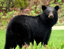

In [62]:
out_pl_baro = widgets.Output()
btn_upload_baro = widgets.FileUpload()
def on_click_baro(change):
    img = PILImage.create(btn_upload_baro.data[-1])
    out_pl_baro.clear_output()
#     with out_pl_baro:
    for i in range(how_many.value):
        display(img.to_thumb(64,64))
            
btn_run_baro = widgets.Button(description='Baro')
btn_run_baro.on_click(on_click_baro)
# btn_upload_baro.observe(on_click_baro, names=['data'])


how_many = widgets.BoundedIntText(
    value=1,
    min=0,
    max=10,
    step=1,
    description='Text:',
    disabled=False
)


display(VBox([widgets.Label('Select your Baro!'), 
      btn_upload_baro, how_many, btn_run_baro, out_pl_baro]))